# Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

In [150]:
##Importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.preprocessing import scale 

from sklearn.model_selection import train_test_split   #train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import GridSearchCV, KFold # Cross validation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  #Evaluation Metrics
from pandas.plotting import lag_plot #check independence of data points
from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


In [151]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [152]:
housing_df=pd.read_csv("train.csv",sep=',')
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1.Data understanding and exploration

In [153]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 1460 rows and 81 columns
Looking at the data types of all columns and comparing them with the data description of each columns, we deduce that the types of following columns have to be changed:
Columns MSSubClass, OverallQual, OverallCond need to be converted to object type
Column LotFrontage and MasVnrArea needs to be converted to numeric type.

In [154]:
## Convert datatype
housing_df[['MSSubClass', 'OverallQual', 'OverallCond']] = housing_df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')
housing_df['LotFrontage'] = pd.to_numeric(housing_df['LotFrontage'], errors='coerce')
housing_df['MasVnrArea'] = pd.to_numeric(housing_df['MasVnrArea'], errors='coerce')

## Check whether the data types of five columns have changed
housing_df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [155]:
#drop id column
housing_df=housing_df.drop('Id',axis=1)

Remove columns having missing values for 75% of records

Creating function to drop columns with missing values based on percentage

In [156]:
def drop_columns_with_missing_values(df, threshold=.75):
    total_rows = len(df)
    missing_threshold = threshold * total_rows

    # Calculate the number of missing values in each column
    missing_counts = df.isnull().sum()

    # Get the column names where the number of missing values is greater than the threshold
    columns_to_drop = missing_counts[missing_counts > missing_threshold].index.tolist()

    # Drop the columns from the DataFrame
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped,columns_to_drop

In [157]:
df_cleaned,dropped_columns = drop_columns_with_missing_values(housing_df, threshold=.75)

In [158]:
print(dropped_columns)

['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [159]:
print(df_cleaned.shape)

(1460, 76)


### Univariate analysis on numeric columns

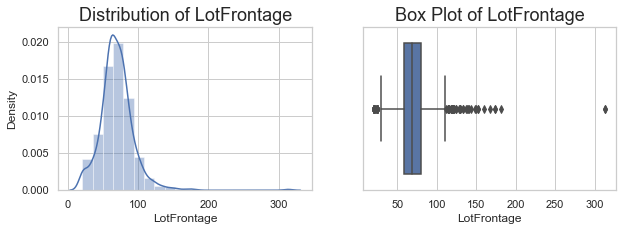

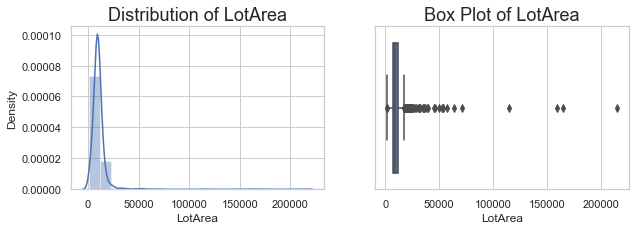

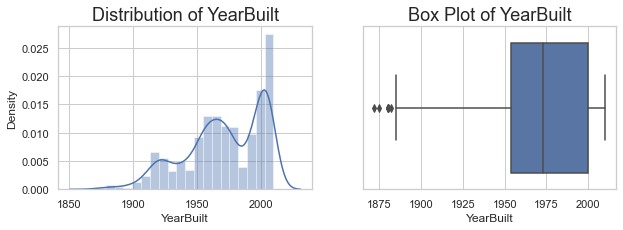

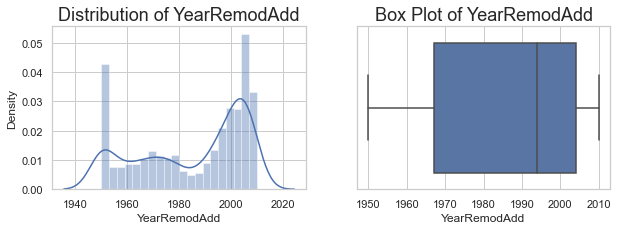

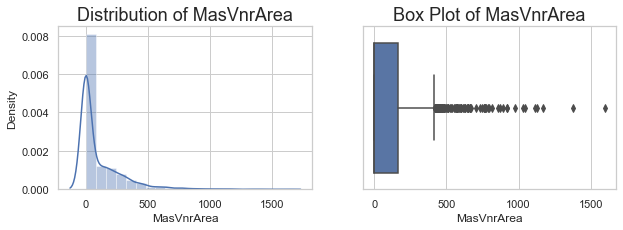

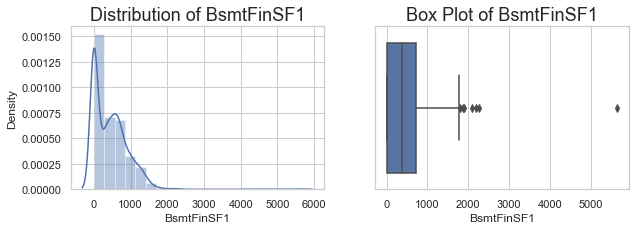

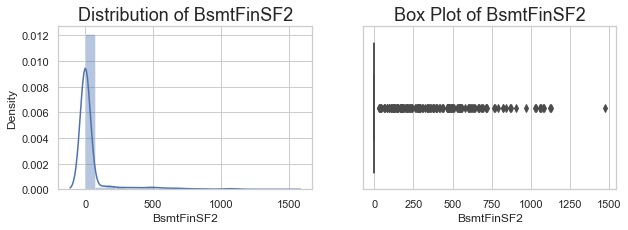

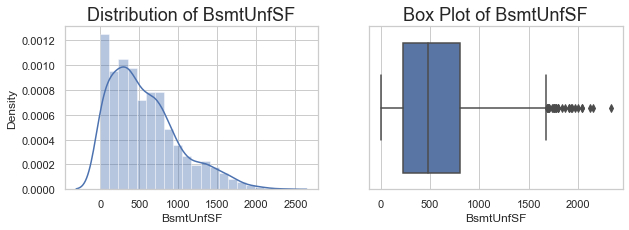

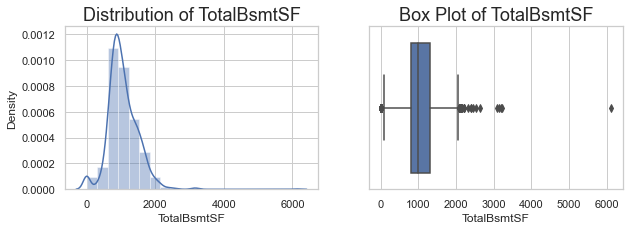

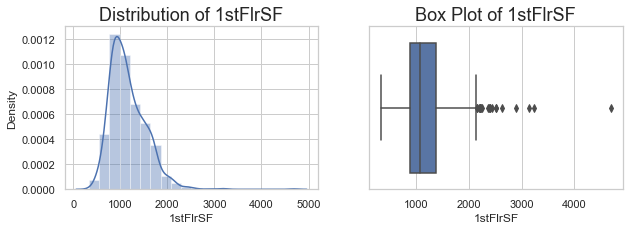

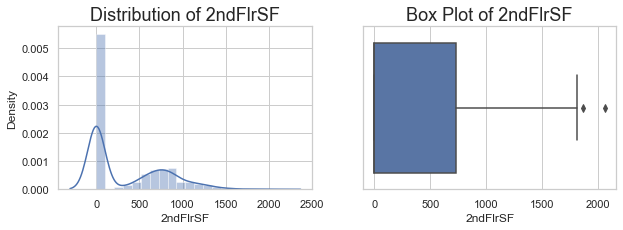

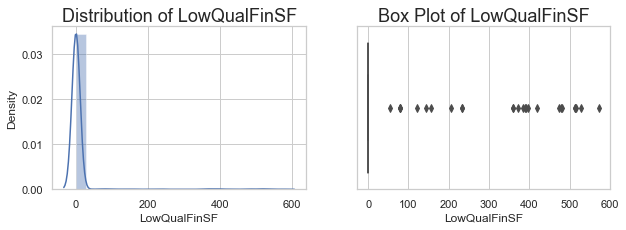

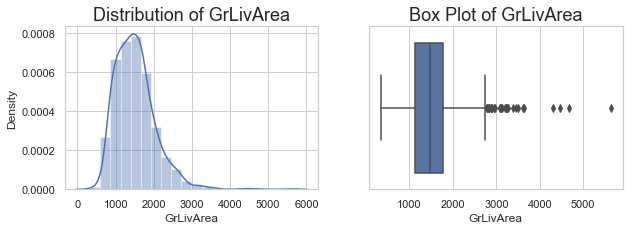

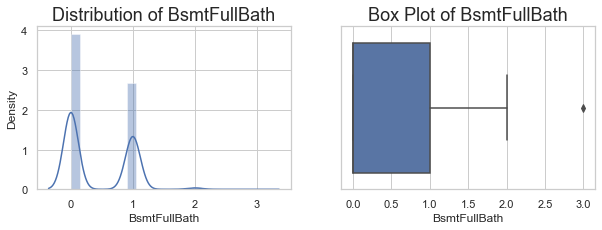

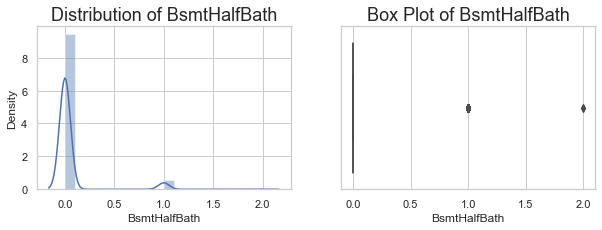

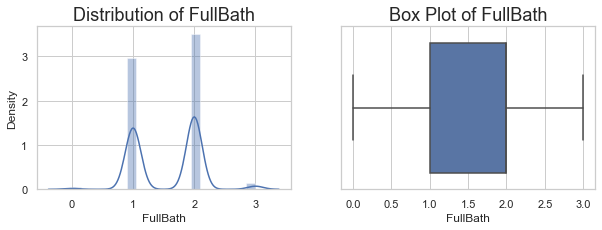

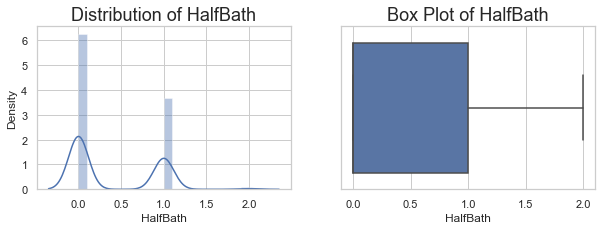

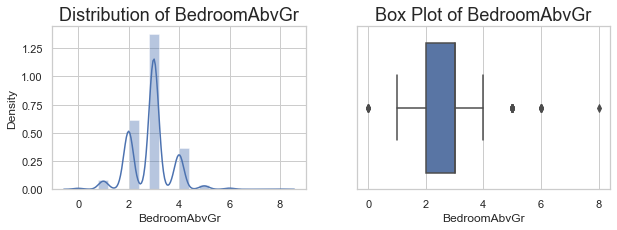

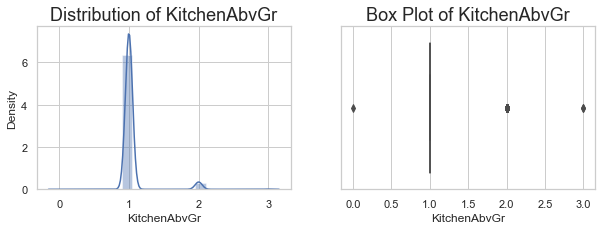

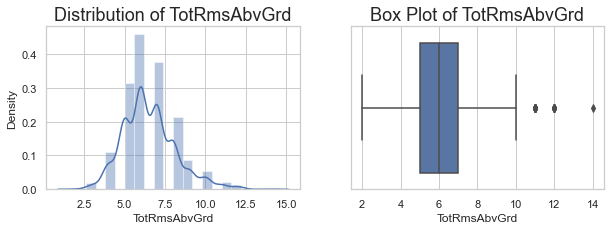

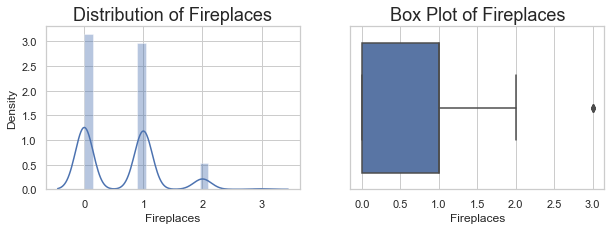

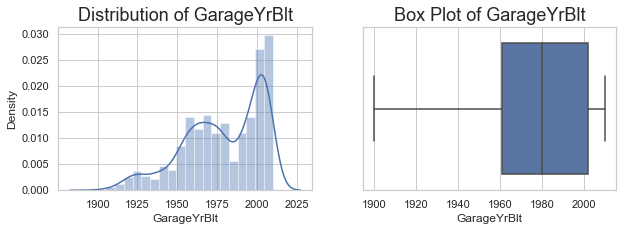

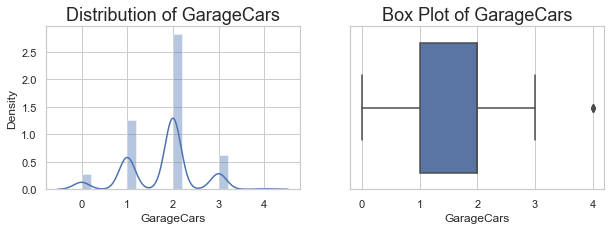

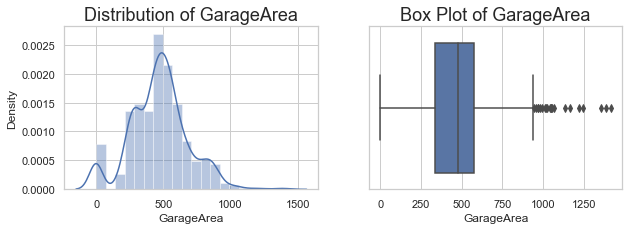

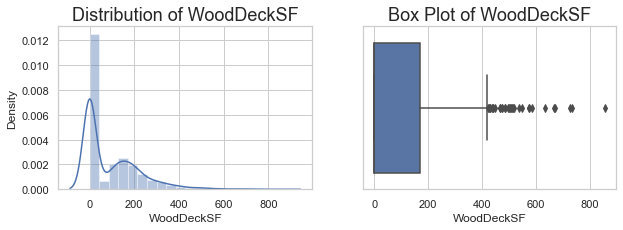

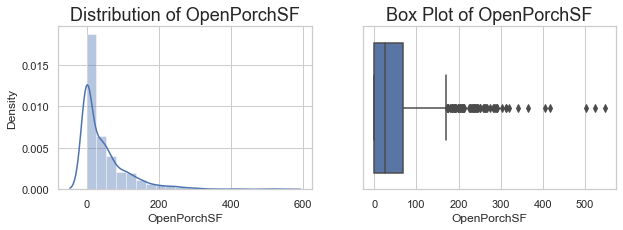

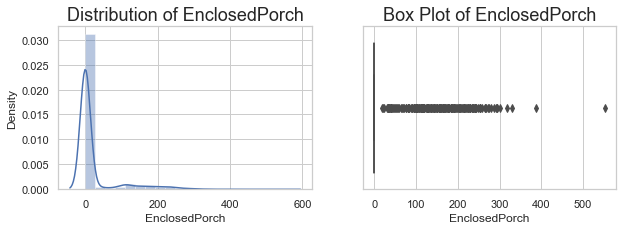

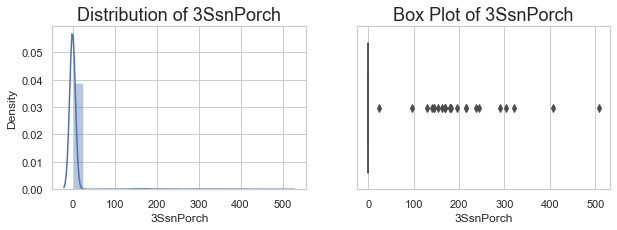

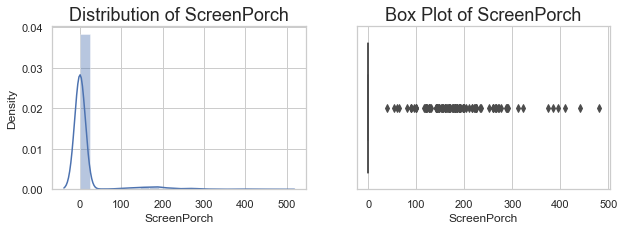

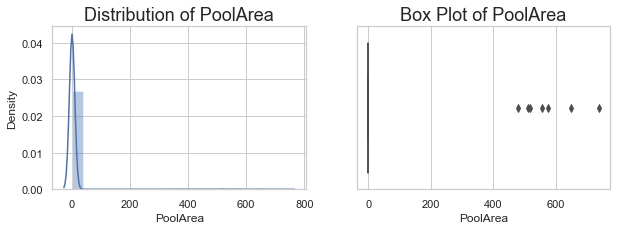

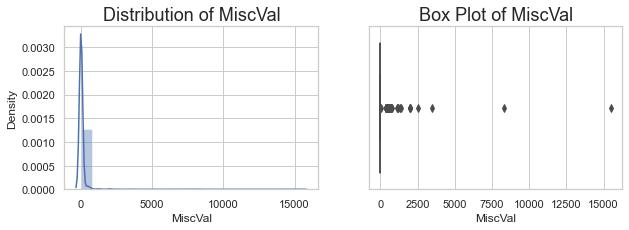

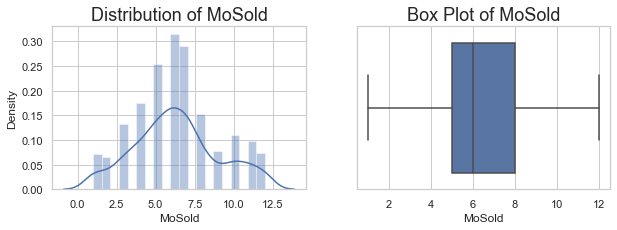

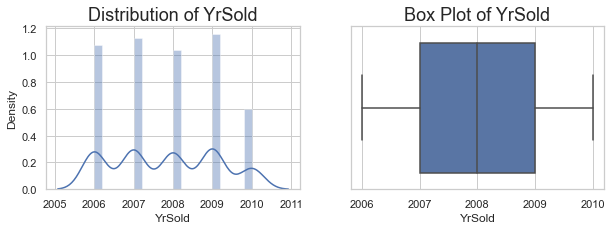

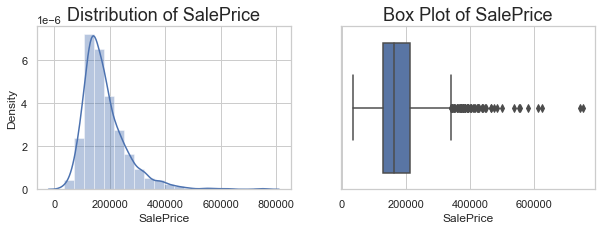

In [160]:
#numeric columns
numeric_columns = df_cleaned.select_dtypes(include=["int64","float64"]).columns
for col in numeric_columns:
    # Create a new figure for each numeric column
    plt.figure(figsize=(10, 3))
       
    # Subplot 1: Distribution Plot
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {col}', fontdict={'fontsize': 18})
    sns.distplot(df_cleaned[col], bins=20)

    
    # Subplot 3: Box Plot
    plt.subplot(1, 2, 2)
    plt.title(f'Box Plot of {col}', fontdict={'fontsize': 18})
    sns.boxplot(x=col, data=df_cleaned)
    
    # Display the figure for the current numeric column
    plt.show()


1. Most of the columns have outliers. So, we will require to do Outlier treatment.
2. Target variable SalePrice is right skewed
3. Many of the numerical columns are having non-normal distribution.
For linear regression, it is not strictly required for the variables to follow a normal distribution,normality assumption primarily applies to the residuals.If the residuals are not normally distributed, you may need to consider transformations or other adjustments

### Bivariate analysis on numeric columns

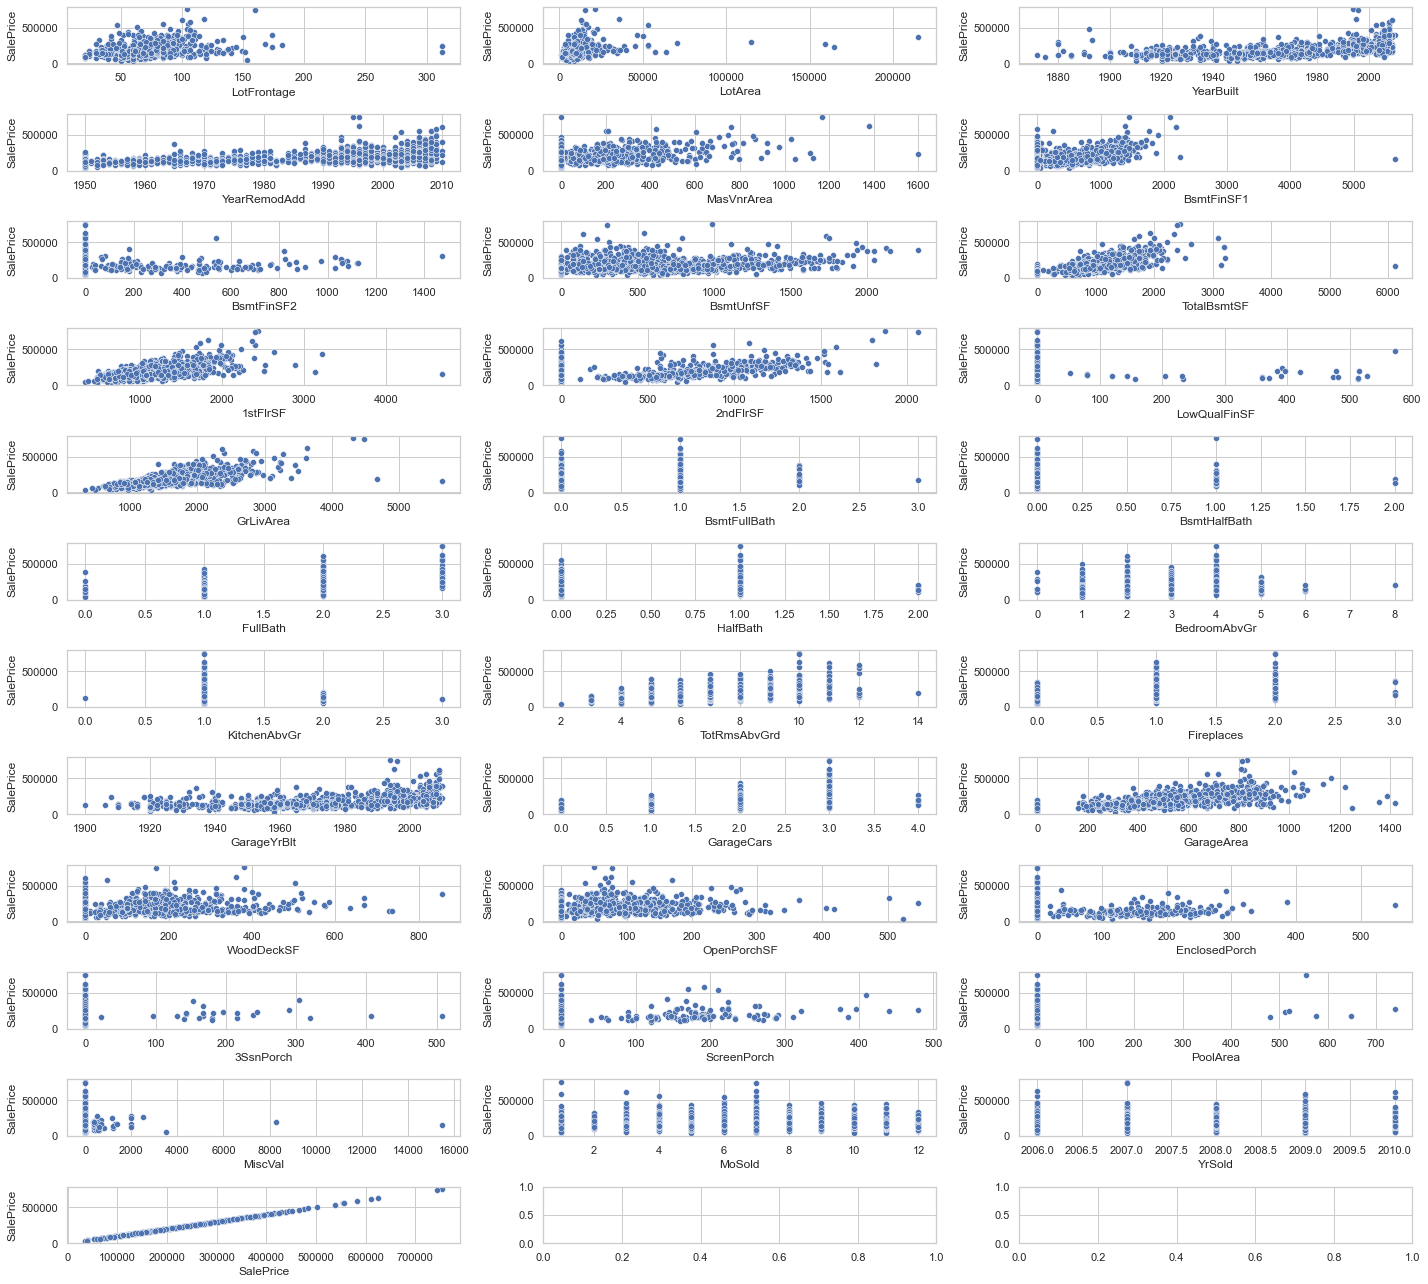

In [161]:
#sns.pairplot(df_cleaned[numeric_columns], x_vars=numeric_columns, y_vars=['SalePrice'], height=10)
#plt.show()--- graph is very small

# numeric columns
numeric_columns = df_cleaned.select_dtypes(include=["int64","float64"]).columns

sns.set(style="whitegrid")
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots in a grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 18))

# Loop through numeric columns and create pairplots
for i, col in enumerate(numeric_columns):
    row_idx = i // n_cols
    col_idx = i % n_cols
    sns.scatterplot(x=col, y='SalePrice', data=df_cleaned, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('SalePrice')

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()


Inferences :

We see that the variables are linearly correlated to SalePrice 
We even observe that some variables like FullBath, GarageCars are not continuously distributed so we can encode them according to their characteritics.

In [162]:
# Define a threshold to identify non-continuous variables (you can adjust this threshold)
continuous_threshold = 10

# List to store the names of variables that should be converted to categorical
variables_to_convert = []

# Loop through all numeric columns and identify non-continuous variables
for col in numeric_columns:
    if len(df_cleaned[col].unique()) <= continuous_threshold:
        variables_to_convert.append(col)

# Convert the identified variables to categorical type
df_cleaned[variables_to_convert] = df_cleaned[variables_to_convert].astype('category')

# Print the list of variables that have been converted
print("Converted variables to categorical:", variables_to_convert)

Converted variables to categorical: ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']


In [163]:
df_cleaned[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   LotFrontage    1201 non-null   float64 
 1   LotArea        1460 non-null   int64   
 2   YearBuilt      1460 non-null   int64   
 3   YearRemodAdd   1460 non-null   int64   
 4   MasVnrArea     1452 non-null   float64 
 5   BsmtFinSF1     1460 non-null   int64   
 6   BsmtFinSF2     1460 non-null   int64   
 7   BsmtUnfSF      1460 non-null   int64   
 8   TotalBsmtSF    1460 non-null   int64   
 9   1stFlrSF       1460 non-null   int64   
 10  2ndFlrSF       1460 non-null   int64   
 11  LowQualFinSF   1460 non-null   int64   
 12  GrLivArea      1460 non-null   int64   
 13  BsmtFullBath   1460 non-null   category
 14  BsmtHalfBath   1460 non-null   category
 15  FullBath       1460 non-null   category
 16  HalfBath       1460 non-null   category
 17  BedroomAbvGr   1460 non-null   ca

#### Derived Features

In [164]:
##Create a new column named 'WhetherRemodelled': This column would determine whether the house has been remodelled or not based on 'YearBuilt' anf 'YearRemodAdd' 

def Remodel_Check(row):     ##Based on the difference between remodelled and built years
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0     #Indicate not Remodelled
    elif (row['YearBuilt'] < row['YearRemodAdd']):
        return 1     #Indicated Remodelled
    else:
        return 2    #Any other observation check
    
df_cleaned['WhetherRemodelled'] = df_cleaned.apply(Remodel_Check, axis=1)
df_cleaned.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,WhetherRemodelled
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0
2,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1
3,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0


In [165]:
##Confirmed: no wrong entries with value '2'. Hence, 0 if not remodelled and 1 if remodelled.
df_cleaned.WhetherRemodelled.value_counts()

WhetherRemodelled
0    764
1    696
Name: count, dtype: int64

In [166]:
##Derive a new variable named 'AgeofProperty' to determine the age of property since the built

def find_age_since_built(row):
        return row['YrSold'] - row['YearBuilt']
    
df_cleaned['AgeofProperty'] = df_cleaned.apply(find_age_since_built, axis=1)
df_cleaned.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,WhetherRemodelled,AgeofProperty
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,5
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,1,7
3,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,1,91
4,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,8


In [167]:
##Dropping the raw attributes from which the new features were derived. These aren't necessary for analysis
##Dropping 'YrSold', 'GarageYrBlt', 'YearRemodAdd' and 'YearBuilt'

df_cleaned = df_cleaned.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1)
df_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,WhetherRemodelled,AgeofProperty
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,0,5
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,0,31
2,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,1,7
3,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,1,91
4,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,0,8


In [168]:
numeric_columns = df_cleaned.select_dtypes(include=["int64","float64"]).columns


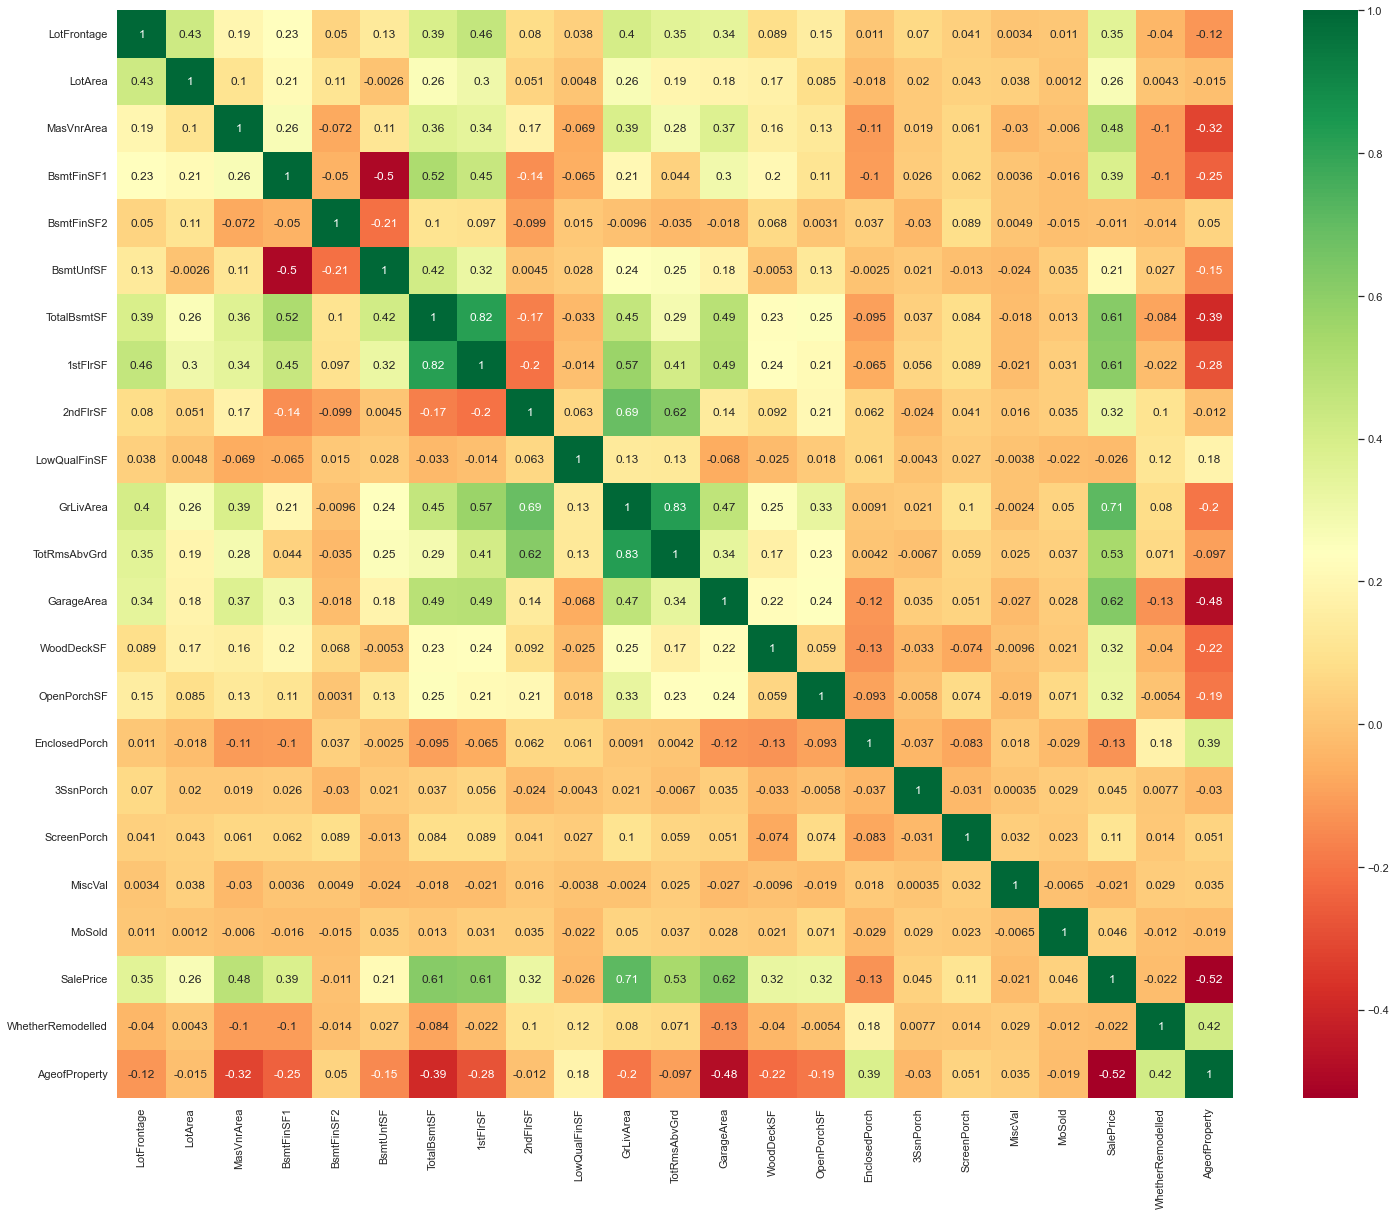

In [169]:
# Plot heatmap to detect correlations among numerical variables
correlation_matrix=df_cleaned[numeric_columns].corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn');

There is multicollinearity among predictors in our data

In [170]:
# Set a threshold for identifying multicollinear pairs
threshold = 0.75  # Adjust this threshold as needed

# Initialize a list to store multicollinear variable pairs
multicollinear_pairs = []

# Iterate through the correlation matrix to identify multicollinear pairs
for i in range(len(numeric_columns)):
    for j in range(i+1, len(numeric_columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            multicollinear_pairs.append((numeric_columns[i], numeric_columns[j]))

# Print the multicollinear variable pairs
for pair in multicollinear_pairs:
    print(f"Multicollinear Pair: {pair[0]} and {pair[1]}, Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")

    # Calculate the correlation of each feature with the target variable
target_variable = 'SalePrice'  # Replace 'Target' with the name of your target variable
target_correlations = correlation_matrix[target_variable]

# Set a correlation threshold for features with the target
target_correlation_threshold = 0.3  # You can adjust this threshold

# Find features highly correlated with the target
highly_correlated_with_target = target_correlations[target_correlations.abs() > target_correlation_threshold]

# Print features highly correlated with the target
print("\nFeatures Highly Correlated with the Target Variable- SalePrice:")
print(highly_correlated_with_target)


Multicollinear Pair: TotalBsmtSF and 1stFlrSF, Correlation: 0.82
Multicollinear Pair: GrLivArea and TotRmsAbvGrd, Correlation: 0.83

Features Highly Correlated with the Target Variable- SalePrice:
LotFrontage      0.352
MasVnrArea       0.477
BsmtFinSF1       0.386
TotalBsmtSF      0.614
1stFlrSF         0.606
2ndFlrSF         0.319
GrLivArea        0.709
TotRmsAbvGrd     0.534
GarageArea       0.623
WoodDeckSF       0.324
OpenPorchSF      0.316
SalePrice        1.000
AgeofProperty   -0.523
Name: SalePrice, dtype: float64


In [171]:
##Removing the highly correlated predictors based on functionality to reduce multicollinearity.
df_cleaned= df_cleaned.drop(['TotRmsAbvGrd','1stFlrSF'], axis = 1)
df_cleaned.head()

#GrLivArea: Above grade (ground) living area square feet
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#TotalBsmtSF: Total square feet of basement area
#1stFlrSF: First Floor square feet

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,WhetherRemodelled,AgeofProperty
0,60,RL,65.000,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,WD,Normal,208500,0,5
1,20,RL,80.000,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,WD,Normal,181500,0,31
2,60,RL,68.000,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,WD,Normal,223500,1,7
3,70,RL,60.000,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,WD,Abnorml,140000,1,91
4,60,RL,84.000,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,WD,Normal,250000,0,8


### Univariate analysis on categorical columns

In [172]:
df_cleaned.select_dtypes(include=["category"]).columns

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea'],
      dtype='object')

In [173]:
#check bias in dataset
object_datatype_columns = df_cleaned.select_dtypes(include=["object","category"]).columns
df_cleaned[object_datatype_columns].describe()


,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolArea,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1379,1379,1460,1379,1379,1460,1460,1460,1460
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,3,4,3,8,4,4,7,4,5,6,3,5,5,5,3,8,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,TA,Typ,0,Gd,Attchd,Unf,2,TA,TA,Y,0,WD,Normal
freq,536,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,397,821,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,856,1378,768,913,804,1392,735,1360,690,380,870,605,824,1311,1326,1340,1453,1267,1198


Columns exists with majority of value belong to specific category. eg: street column has Pave value for majority of records

Let's drop dominant category columns.

In [174]:
#If one category constitutes more than 90% of the data, it is better to drop that columns so as to get rid of bias
# Define a threshold for proportion of the dominant category 
threshold = 0.9  
dominant_cat_columns_to_drop = []

for column in object_datatype_columns:
    value_counts = df_cleaned[column].value_counts(normalize=True)
    dominant_category_proportion = value_counts.max()
    
    if dominant_category_proportion > threshold:
        dominant_cat_columns_to_drop.append(column)
print(dominant_cat_columns_to_drop)

df_cleaned=df_cleaned.drop(dominant_cat_columns_to_drop,axis=1)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea']


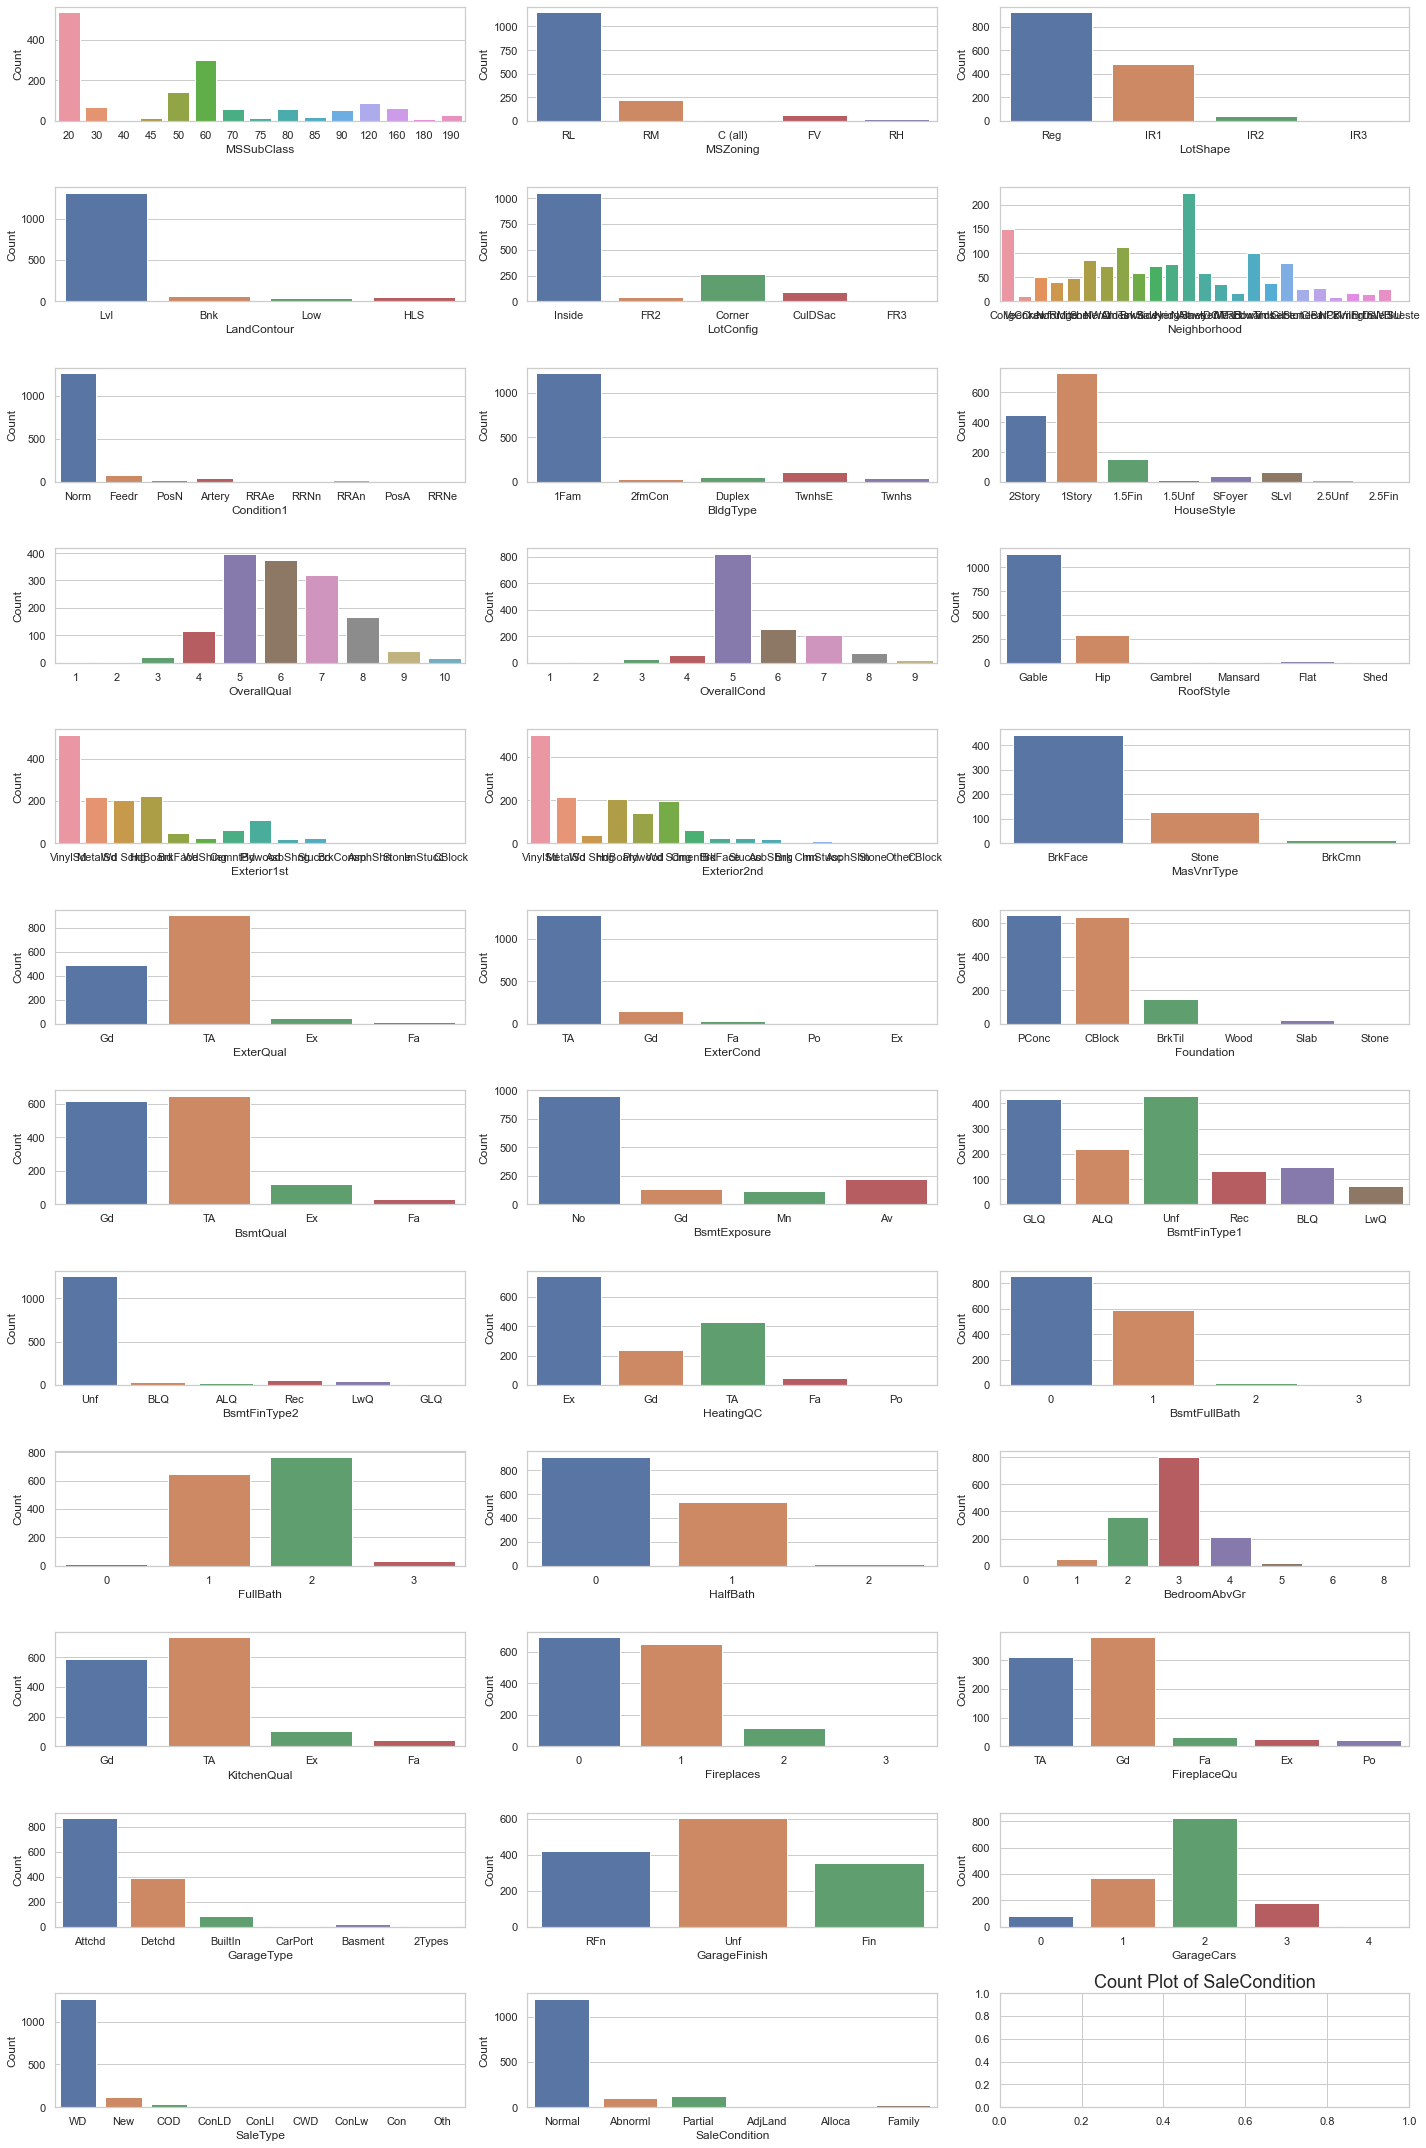

In [175]:
#frequency distribution plot for categorical columns
#categorical columns
categorical_columns = df_cleaned.select_dtypes(include=["object","category"]).columns


sns.set(style="whitegrid")
n_cols = 3  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots in a grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))

# Loop through numeric columns and create pairplots
for i, col in enumerate(categorical_columns):
    row_idx = i // n_cols
    col_idx = i % n_cols
    plt.title(f'Count Plot of {col}', fontdict={'fontsize': 18})
    sns.countplot(data=df_cleaned, x=col, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Count')
    

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()

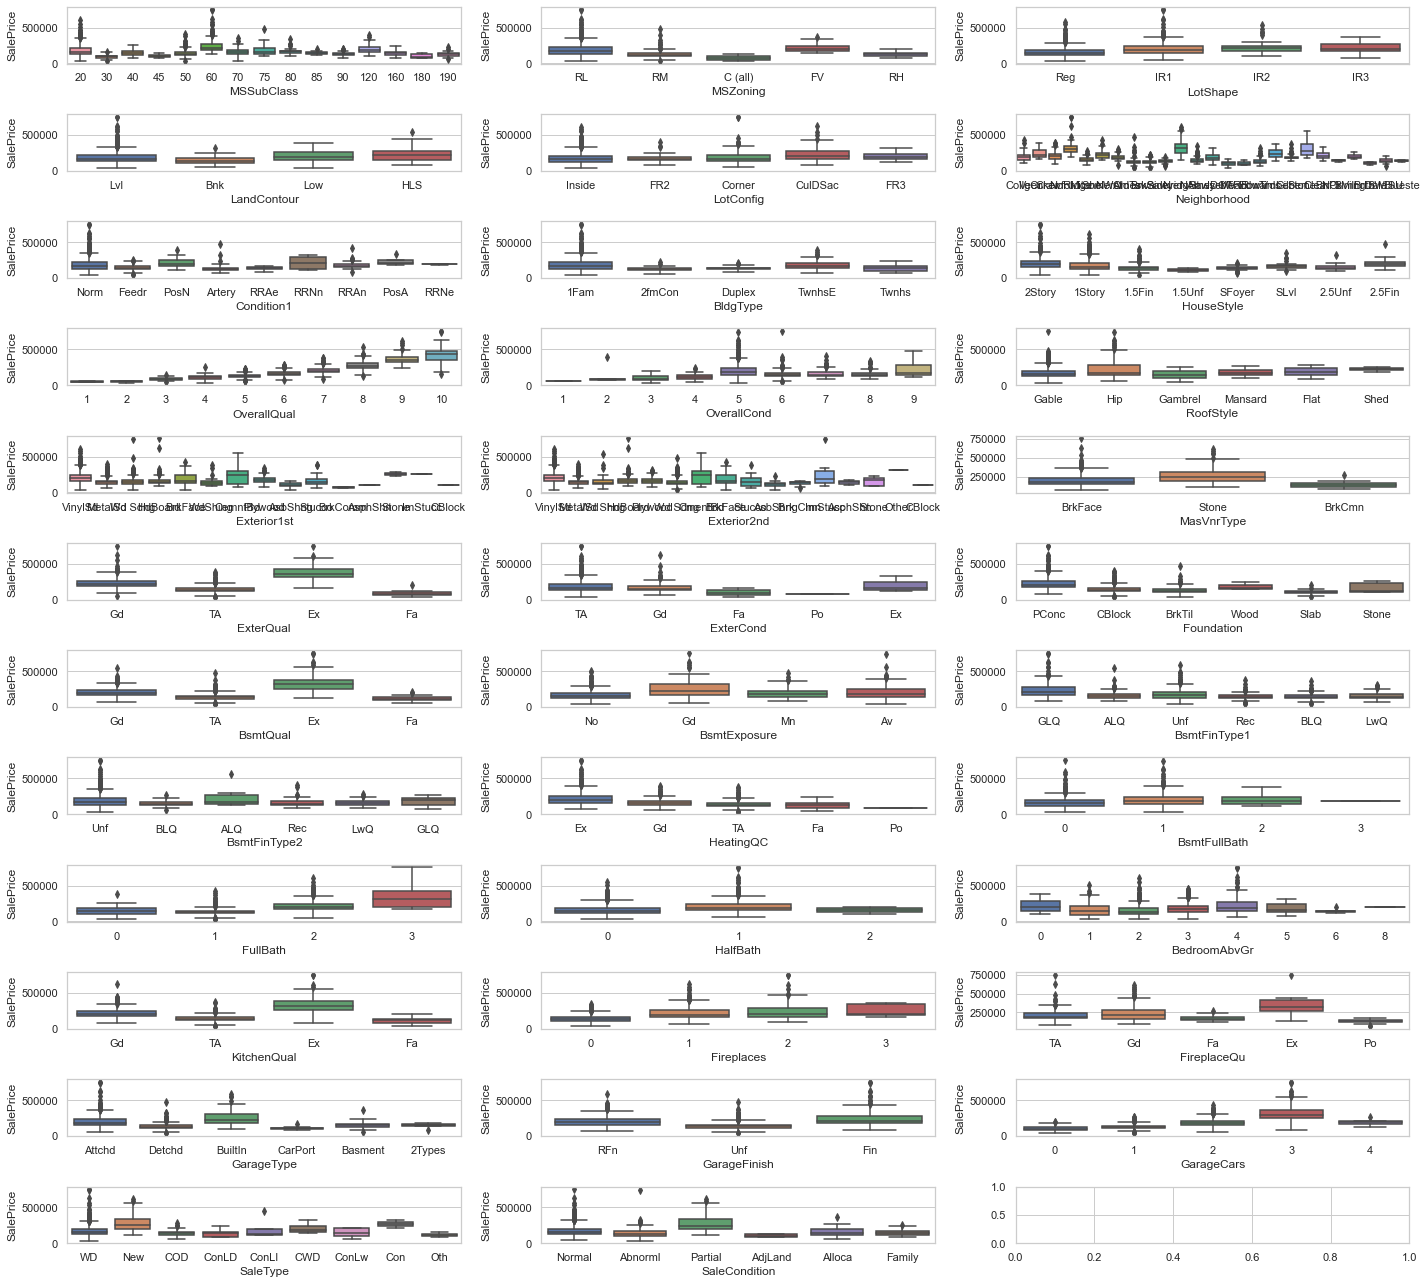

In [176]:
#Bivariate analysis on categorical variables
#categorical_columns = df_cleaned.select_dtypes(include=["object"]).columns

# Replace 'df_cleaned' with your DataFrame and 'SalePrice' with your target variable name
sns.set(style="whitegrid")
n_cols = 3  # Number of columns in the grid
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows

# Create subplots in a grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 18))

# Loop through numeric columns and create pairplots
for i, col in enumerate(categorical_columns):
    row_idx = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(x=col, y='SalePrice', data=df_cleaned, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('SalePrice')

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()

- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price 
- The house with Exterior Quality of type Execellent has the highest SalePrice. 
- The house with Basement Quality of type Execellent has the highest SalePrice. 
- The house with Kitchen Quality of type Execellent has the highest SalePrice. 
- The house with Garage Type of type BuiltIn has the highest SalePrice.


# 2. Data cleaning & Preparation

In [177]:
# check for columns with constant/default values
constant_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
print("List of columns with constant/default values: ",constant_columns)
#There is no column which has constant value

List of columns with constant/default values:  []


In [178]:
# Checking for duplicates
print("Number of duplicate rows: ", df_cleaned.duplicated().sum())
#there were zero duplicate values in the dataset.

Number of duplicate rows:  0


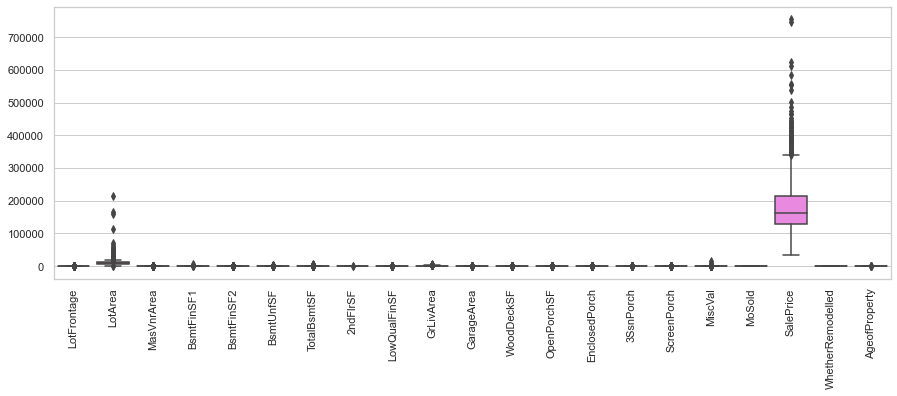

In [179]:
## Check the boxplots to see outliers 
numeric_columns = df_cleaned.select_dtypes(include=["int64","float64"]).columns
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(data=df_cleaned[numeric_columns]);

In [180]:
## Capping outliers to 5% at lower bound and 95% at upper bound
for col in numeric_columns:
    df_cleaned[col][df_cleaned[col] <= df_cleaned[col].quantile(0.05)] = df_cleaned[col].quantile(0.05)
    df_cleaned[col][df_cleaned[col] >= df_cleaned[col].quantile(0.95)] = df_cleaned[col].quantile(0.95)

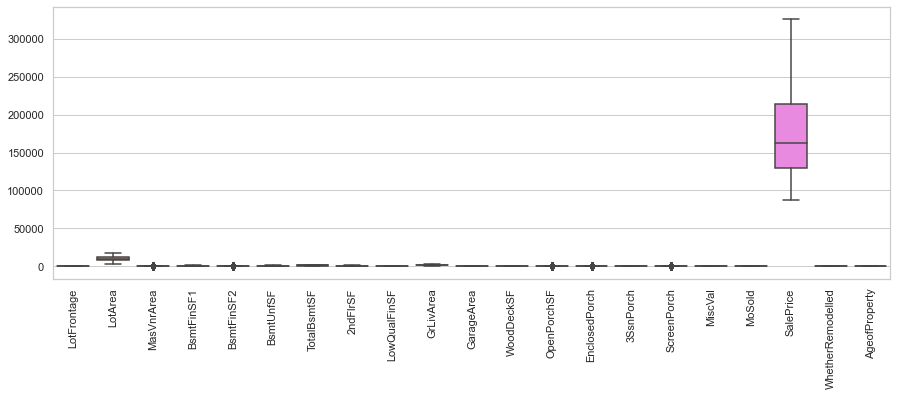

In [181]:
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(data=df_cleaned[numeric_columns]);

In [182]:
##Inspecting null values
# row-wise null count check
print(df_cleaned.isnull().sum(axis=1))
print(df_cleaned.isnull().sum(axis=1).max())
#there are rows with null values

0       1
1       1
2       0
3       1
4       0
5       2
6       0
7       1
8       1
9       1
10      2
11      0
12      3
13      0
14      1
15      2
16      1
17      6
18      2
19      2
20      0
21      1
22      0
23      1
24      2
25      0
26      2
27      0
28      1
29      2
30      2
31      3
32      2
33      1
34      0
35      0
36      2
37      0
38      2
39      8
40      0
41      1
42      3
43      3
44      2
45      0
46      1
47      2
48      4
49      2
50      3
51      1
52      2
53      1
54      1
55      0
56      1
57      2
58      0
59      2
60      2
61      2
62      0
63      2
64      2
65      0
66      1
67      1
68      2
69      1
70      0
71      2
72      0
73      1
74      2
75      2
76      3
77      2
78      4
79      2
80      0
81      1
82      0
83      1
84      1
85      0
86      1
87      1
88      4
89      4
90      6
91      1
92      2
93      1
94      2
95      1
96      1
97      1
98      2
99      4


In [183]:
# Handling NAN for categorical columns -Filling with the mode (most frequent value)
object_datatype_columns = df_cleaned.select_dtypes(include=["object"]).columns
for column in object_datatype_columns:
    mode_value = df_cleaned[column].mode().iloc[0]  # Calculate the mode
    df_cleaned[column].fillna(mode_value, inplace=True)

    
# Handling NAN for numeric columns -Filling with zero
numeric_columns = df_cleaned.select_dtypes(include=["int64","float64"]).columns
for column in numeric_columns:
    #mean_value = df_cleaned[column].mean()  # Calculate the mode
    #df_cleaned[column].fillna(mean_value, inplace=True)
    df_cleaned[column].fillna(0, inplace=True)

    

In [184]:
# check again to validate nulls
print(df_cleaned.isnull().sum(axis=1).max())


0


In [185]:
#df_cleaned["LotFrontage"] = np.log(df_cleaned["LotFrontage"])

Text(0.5, 1.0, 'Distribution of the SalePrice variable.')

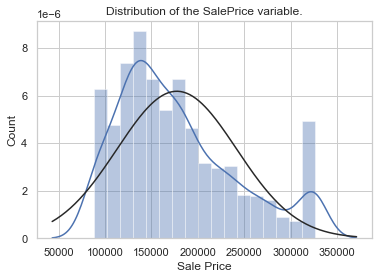

In [186]:
#Analysis on Target variable
from scipy.stats import norm 
sns.distplot(df_cleaned['SalePrice'] , fit=norm).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")

#Target variable is right skewed

Target variable is right skewed

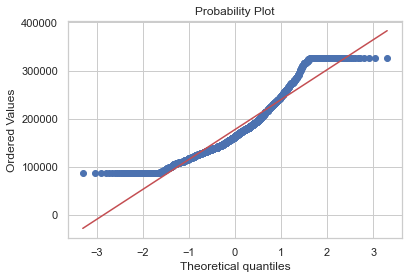

In [187]:
#Plotting the QQ-plot
#In a QQ plot, if your data points closely follow a straight diagonal line, it suggests that your data is approximately normally distributed. 
from scipy import stats
from scipy.stats import norm, skew 
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

In a QQ plot, data points donot closely follow a straight diagonal line. Deviations from the diagonal line indicate departures from normality.The target variable is right skewed (tail to the right).We need to use log tranformation method to make the data more symmetric and closer to a normal distribution.

#### Log-transformation of the target variable

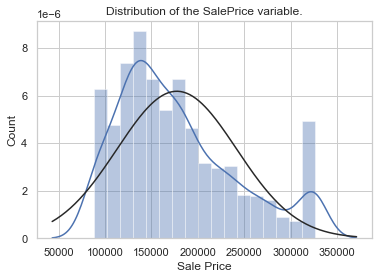

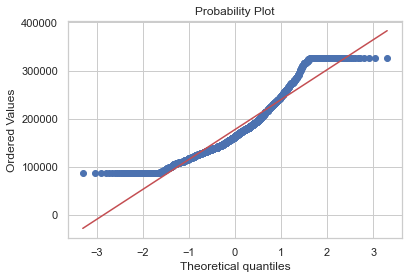

In [188]:
#We use the numpy function log to all elements of the column
#df_cleaned["SalePrice"] = np.log(df_cleaned["SalePrice"])

#Checking the new distribution 
sns.distplot(df_cleaned['SalePrice'] , fit=norm).set(xlabel='Sale Price', ylabel='Count');
plt.title("Distribution of the SalePrice variable.")
#Plotting the QQ-plot
fig = plt.figure()
res = stats.probplot(df_cleaned['SalePrice'], plot=plt)
plt.show()

### Dummy Variable

In [189]:
df_cleaned.shape

(1460, 56)

In [190]:
df_cleaned['OverallQual'] = df_cleaned['OverallQual'].astype(str)
df_cleaned['OverallQual'] = df_cleaned['OverallQual'].str.strip()
df_cleaned['OverallCond'] = df_cleaned['OverallCond'].astype(str)
df_cleaned['OverallCond'] = df_cleaned['OverallCond'].str.strip()

In [191]:
# Define the key-value mapping for replacement
OverallQual_dict = {'1':'10_VeryExcellent','9':'9_Excellent','8':'8_VeryGood','7':'7_Good','6':'6_AboveAverage','5':'5_Average','4':'4_BelowAverage','3':'3_Fair','2':'2_Poor','1':'1_VeryPoor'}
df_cleaned['OverallQual'] = df_cleaned['OverallQual'].replace(OverallQual_dict)
df_cleaned['OverallCond'] = df_cleaned['OverallCond'].replace(OverallQual_dict)

In [192]:
df_cleaned.shape

(1460, 56)

In [193]:
#handling all categorical columns
housing_data_with_dummies = pd.get_dummies(df_cleaned, columns=object_datatype_columns, drop_first=True,prefix=object_datatype_columns).astype(int)
#housing_data = pd.concat([df_cleaned,housing_data_with_dummies],axis=1)
#housing_data =housing_data.drop(object_datatype_columns,axis=1)

housing_data_with_dummies.shape

(1460, 210)

In [194]:
df_cleaned.select_dtypes(include=["object","category"]).columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [195]:
housing_data_with_dummies.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,WhetherRemodelled,AgeofProperty,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1_VeryPoor,OverallQual_2_Poor,OverallQual_3_Fair,OverallQual_4_BelowAverage,OverallQual_5_Average,OverallQual_6_AboveAverage,OverallQual_7_Good,OverallQual_8_VeryGood,OverallQual_9_Excellent,OverallCond_2_Poor,OverallCond_3_Fair,OverallCond_4_BelowAverage,OverallCond_5_Average,OverallCond_6_AboveAverage,OverallCond_7_Good,OverallCond_8_VeryGood,OverallCond_9_Excellent,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65,8450,196,706,0,150,856,854,0,1710,1,2,1,3,0,2,548,0,61,0,0,0,0,2,208500,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80,9600,0,978,0,284,1262,0,0,1262,0,2,0,3,

In [196]:
#Final check of missing values 
Total_missing = housing_data_with_dummies.isnull().sum().sort_values(ascending = False)
Total_missing_Perc = (100*housing_data_with_dummies.isnull().sum()/df_cleaned.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([Total_missing,Total_missing_Perc], axis=1, keys=['Total_missing_values', 'Percent_missing_values'])
df_missing_values

,Total_missing_values,Percent_missing_values
LotFrontage,0,0.000
ExterCond_TA,0,0.000
Exterior1st_WdShing,0,0.000
Exterior2nd_AsphShn,0,0.000
Exterior2nd_Brk Cmn,0,0.000
Exterior2nd_BrkFace,0,0.000
Exterior2nd_CBlock,0,0.000
Exterior2nd_CmentBd,0,0.000
Exterior2nd_HdBoard,0,0.000
Exterior2nd_ImStucc,0,0.000


# Splitting the Data into Training and Testing Sets

In [197]:
#df_cleaned["SalePrice"] = np.log(df_cleaned["SalePrice"])

In [198]:

np.random.seed(0)
df_train, df_test = train_test_split(housing_data_with_dummies, train_size = 0.70, test_size = 0.30, random_state = 42)
print(df_train.shape)
print(df_test.shape)

(1021, 210)
(438, 210)


# Rescaling the Features

In [199]:

#instantiate the object
scaler = StandardScaler()

In [200]:

## Scale the numerical columns 
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

In [201]:
df_train_orig=df_train
df_test_orig=df_test

In [202]:
df_train_orig.shape

(1021, 210)

# Dividing into X and Y sets for the model building

In [203]:
#y_train=df_train.drop(columns=['SalePrice'])
y_train=df_train.pop('SalePrice')
X_train=df_train
y_test=df_test.pop('SalePrice')
#y_test=df_test.drop(columns=['SalePrice'])
X_test=df_test



# Model Building and Evaluation

In [204]:
## Define a function for checking metrics 

def show_metrics(y_train, y_train_pred, y_test, y_pred):
    ''' 
    Takes in the values of true y_train and y_test, and predicted y_train and y_test.
    Prints out 
    1. R-Squared (Train)
    2. R-Squared (Test)
    3. RSS (Train)
    4. RSS (Test)
    5. MSE (Train)
    6. MSE (Test)
    7. RMSE (Train)
    8. RMSE (Test)
    
    Returns a list containing all the above 8 metrics
    
    '''
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = []
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

# Linear Regression

Lets do feature selection before predicting sales

In [205]:
#Running RFE to select 105 variables 

lm = LinearRegression()
X_train.columns = X_train.columns.astype(str)
lm.fit(X_train, y_train)
#rfe = RFECV(estimator=lm, cv=5)
rfe = RFE(estimator=lm, n_features_to_select=110) # Adjusted to 105 features after seeing features getting removed using cross-validation and ensuring top 10 features using lasso is not eliminated
# Fit RFE to the training data
rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
#col

In [206]:
# Instantiate
lm = LinearRegression()

# Fit a line
X_train_rfe = X_train[col]
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [207]:
#import statsmodels.api as sm  
#X_train_rfe = sm.add_constant(X_train_rfe)
#lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
#print(lm.summary())

In [208]:
y_train_pred = lm.predict(X_train_rfe)
df_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,WhetherRemodelled,AgeofProperty,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1_VeryPoor,OverallQual_2_Poor,OverallQual_3_Fair,OverallQual_4_BelowAverage,OverallQual_5_Average,OverallQual_6_AboveAverage,OverallQual_7_Good,OverallQual_8_VeryGood,OverallQual_9_Excellent,OverallCond_2_Poor,OverallCond_3_Fair,OverallCond_4_BelowAverage,OverallCond_5_Average,OverallCond_6_AboveAverage,OverallCond_7_Good,OverallCond_8_VeryGood,OverallCond_9_Excellent,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,0.739,0.186,1.351,-1.060,-0.317,1.776,0.711,-0.824,0.000,0.381,0,2,0,3,1,2,0.288,0.064,-0.828,-0.369,0.000,-0.297,0.000,-0.539,-0.961,0.061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0

In [209]:
# Calculate the VIFs for the  model

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
43,BldgType_TwnhsE,inf
11,MSSubClass_90,inf
41,BldgType_Duplex,inf
42,BldgType_Twnhs,inf
14,MSSubClass_180,inf
13,MSSubClass_160,inf
12,MSSubClass_120,inf
72,Exterior2nd_CBlock,inf
60,Exterior1st_CBlock,inf
97,GarageType_Attchd,158.210


An infinite (inf) value for Variance Inflation Factor (VIF) indicates a severe issue of multicollinearity in  dataset. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to isolate the individual effects of each variable. This can result in unstable coefficient estimates and large standard errors.

In [210]:
y_train_pred = lm.predict(X_train_rfe)
X_test=X_test[X_train_rfe.columns]
y_pred = lm.predict(X_test)


In [211]:
## Check metrics
linear_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)
print(linear_metrics)

R-Squared (Train) = 0.92
R-Squared (Test) = -54381756228174032.00
RSS (Train) = 77.61
RSS (Test) = 24603771128506093568.00
MSE (Train) = 0.08
MSE (Test) = 56172993444077840.00
RMSE (Train) = 0.28
RMSE (Test) = 237008424.84
[0.9239909044466208, -5.438175622817403e+16, 77.60528656000011, 2.4603771128506094e+19, 0.07600909555337915, 5.617299344407784e+16, 0.2756974710681604, 237008424.8377636]


Model seems to perform well on the training data (based on R-squared and low MSE/RMSE), but it performs very poorly on the test data (based on the extremely high R-squared and MSE/RMSE). This suggests overfitting or some issues with the model's ability to generalize to new, unseen data.

Residual Analysis of the train data

Text(0.5, 0, 'Errors')

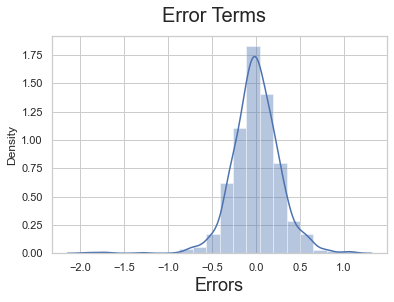

In [212]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
#Error terms are normally distributed with mean zero

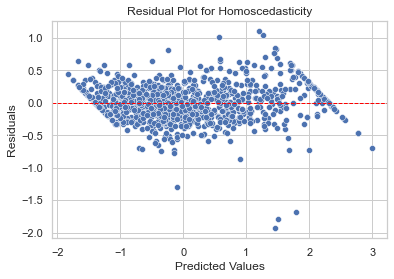

In [213]:
# Create a scatterplot of residuals against the predicted values
residuals = y_train - y_train_pred
sns.scatterplot(x=y_train_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Add a horizontal line at y=0
plt.show()
#This shows error terms have constant variance


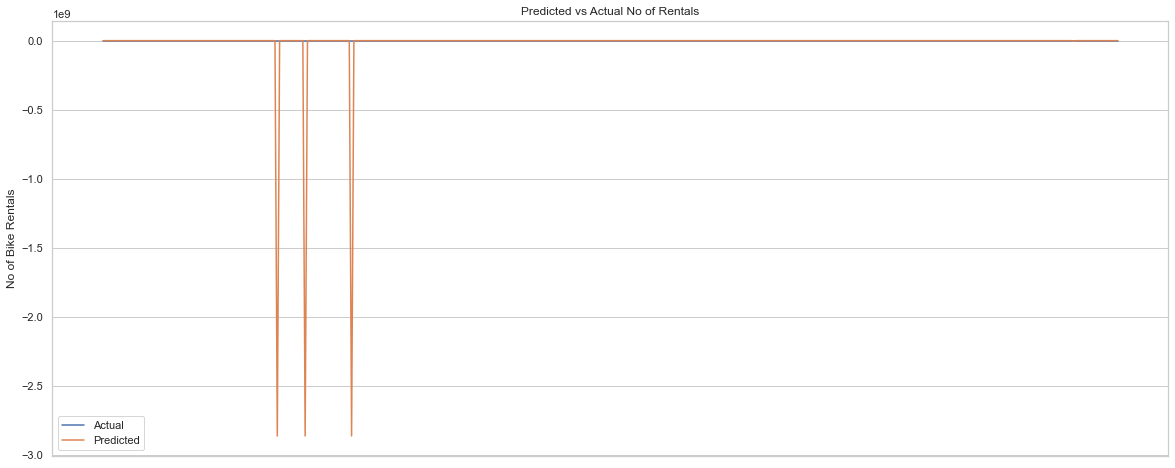

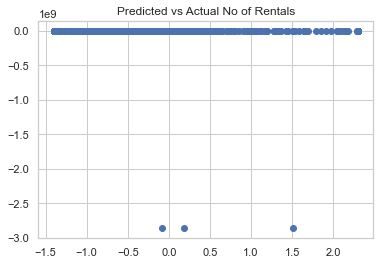

In [214]:
#model evaluation
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

#plt.figure(figsize=[8,8])
plt.scatter(y_test,y_pred);
plt.title('Predicted vs Actual No of Rentals');

# Ridge Regression

Ridge regression aim to reduce the magnitude of coefficients while retaining all features

In [258]:
#Ridge Regression on selected features
X_train=X_train_rfe
X_test=X_test[X_train_rfe.columns]


In [259]:
## Now to create a Ridge Regression model
## we will run a cross validation on a list of alphas to find the optimum value of alpha
#α is a hyperparameter that controls the strength of the L2/ridge regularization term added to the linear regression cost function. 

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation that retrieve 28*5=140 fits
#Perform k-fold cross-validation: Split your dataset into k-folds (typically 5 or 10) to create k subsets of your data.
# Higher the neg_mean_absolute_error, better the model is
ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [260]:
## View the optimal value of alpha
ridgeCV.best_params_



{'alpha': 4.0}

In [261]:
## View the results of cross validation search for 28 values of alpha
ridgeCV.cv_results_

{'mean_fit_time': array([0.02652769, 0.01735592, 0.02174206, 0.02253938, 0.02134314,
        0.02154198, 0.02453399, 0.02293839, 0.02393537, 0.0221406 ,
        0.02293811, 0.02273993, 0.02154279, 0.02134318, 0.02094431,
        0.02373295, 0.02233772, 0.02293887, 0.02632966, 0.02094378,
        0.02732716, 0.02353697, 0.02473431, 0.02453537, 0.02912173,
        0.02333732, 0.02114406, 0.02054219]),
 'std_fit_time': array([0.00312401, 0.00392263, 0.00171565, 0.0025701 , 0.00149311,
        0.00184884, 0.00349029, 0.00209237, 0.00398828, 0.00247519,
        0.00302446, 0.00270613, 0.00119686, 0.00101723, 0.00141064,
        0.00525749, 0.00325607, 0.00423194, 0.00720781, 0.00178371,
        0.01120528, 0.00325286, 0.00330125, 0.00325293, 0.00518001,
        0.00257017, 0.00212939, 0.00149011]),
 'mean_score_time': array([0.00797706, 0.00757704, 0.00857725, 0.00877614, 0.00777922,
        0.00877681, 0.00877843, 0.00877705, 0.0111732 , 0.00897737,
        0.00877924, 0.01096997, 0.008577

Thus, we get optimum value of alpha as 4
Now we will build a ridge regression model using this value.

In [262]:
# Create a ridge regreesion instance with optimum value alpha=.
ridge = Ridge(alpha=4)
# Fit the model on training data
ridge.fit(X_train, y_train)

Ridge(alpha=4)

In [263]:
## Make predictions
y_train_pred_r = ridge.predict(X_train)
y_pred_r = ridge.predict(X_test)

In [264]:
## Check metrics
ridge_metrics = show_metrics(y_train, y_train_pred_r, y_test, y_pred_r)

R-Squared (Train) = 0.92
R-Squared (Test) = 0.90
RSS (Train) = 84.36
RSS (Test) = 43.78
MSE (Train) = 0.08
MSE (Test) = 0.10
RMSE (Train) = 0.29
RMSE (Test) = 0.32


In [265]:
#Now, we will plot R2 Score against different values of alpha for both train and test sets
## Create a dataframe of ridge cross validation results
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
#ridgeCV_results

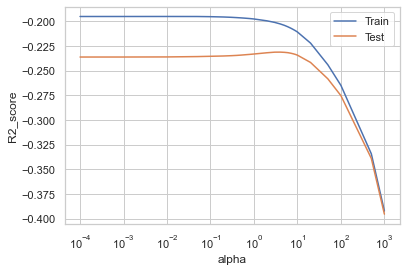

In [266]:
## Plotting R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in train error and an initial increase followed by decrease in test error.
- From graph also, it is apparent that the optimal value of alpha is 4(in picture it is closer to 5). It is the point where the test R2 score starts to level off or even decrease as alpha increases

In [267]:
# Extract alpha values and R2 scores for the test data
alpha_values = ridgeCV_results['param_alpha']
test_scores = ridgeCV_results['mean_test_score']

# Find the index of the maximum R2 score on the test data
optimal_alpha_index = np.argmax(test_scores)

# Get the optimal alpha value
optimal_alpha = alpha_values[optimal_alpha_index]

# Print the optimal alpha
print(f"Optimal value of lambda (alpha) for Ridge Regression: {optimal_alpha}")

Optimal value of lambda (alpha) for Ridge Regression: 4.0


Text(0.5, 0, 'Errors')

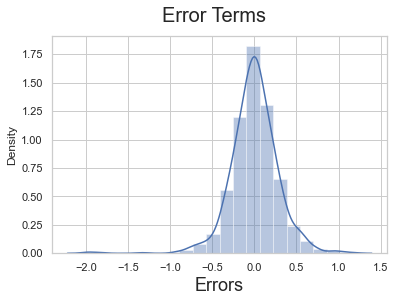

In [268]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred_r), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
#Error terms are normally distributed with mean zero

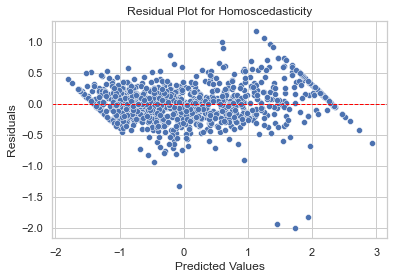

In [269]:
# Create a scatterplot of residuals against the predicted values
residuals = y_train - y_train_pred_r
sns.scatterplot(x=y_train_pred_r, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Add a horizontal line at y=0
plt.show()
#This shows error terms have constant variance

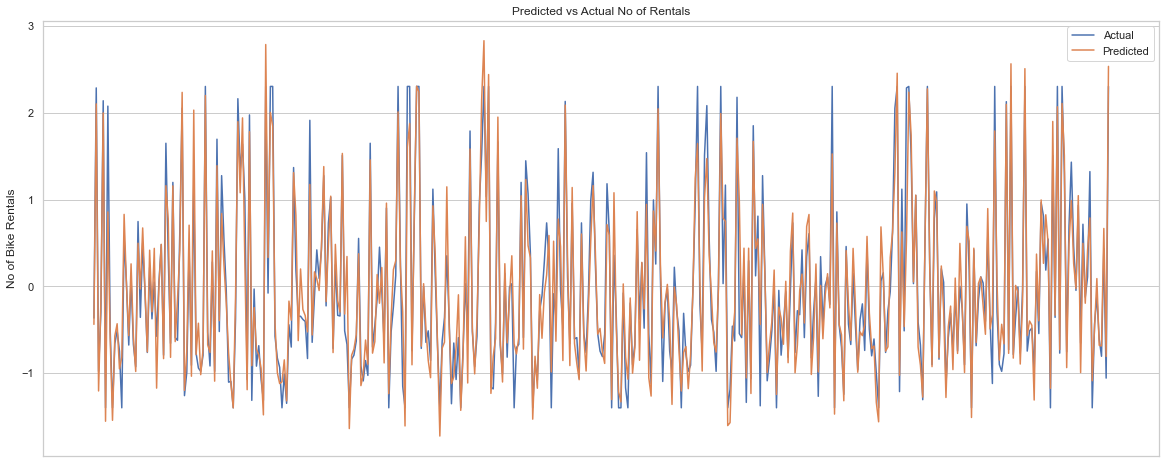

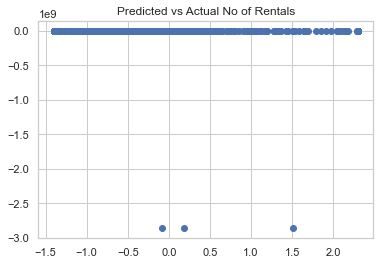

In [270]:
#Model Evaludation
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred_r)),y_pred_r)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

#plt.figure(figsize=[8,8])
plt.scatter(y_test,y_pred);
plt.title('Predicted vs Actual No of Rentals');

#Predicted vs observed value plots shows that the model is reasonably accurate.

# Model 2: Lasso

Lasso help to achieve model simplicity and reduce the features by setting some coefficients to zero

Option 1: Lasso executed on original set of features

In [311]:
lassoCV_orig = Lasso()



y_train_orig=y_train
X_train_orig=df_train_orig
y_test_orig=y_test
X_test_orig=df_test_orig

# cross validation that retrieve 28*5=140 fits
# Higher the neg_mean_absolute_error, better the model is
lassoCV_orig = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV_orig.fit(X_train_orig, y_train_orig) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.001), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [312]:
## View the optimal value of alpha
lassoCV_orig.best_params_

{'alpha': 0.001}

In [313]:
# Create a ridge regreesion instance with optimum value
lassoCV_orig = Lasso(alpha=0.001)
# Fit the model on training data
lassoCV_orig.fit(X_train, y_train)

Lasso(alpha=0.001)

In [314]:
## Make predictions
y_train_pred_l_orig = lasso.predict(X_train)
y_pred_l_orig = lasso.predict(X_test)

In [315]:
## Check metrics
lasso_metrics_orig = show_metrics(y_train, y_train_pred_l_orig, y_test, y_pred_l_orig)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.90
RSS (Train) = 87.65
RSS (Test) = 43.84
MSE (Train) = 0.09
MSE (Test) = 0.10
RMSE (Train) = 0.29
RMSE (Test) = 0.32


option2: Lasso executed after reducing some feature using RFE

In [305]:
## Now to create a Lasso model
## we will run a cross validation on a list of 28 alphas to find the optimum value of alpha

#commented out as code remains same
#params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
#                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lassoCV = Lasso()

# cross validation that retrieve 28*5=140 fits
# Higher the neg_mean_absolute_error, better the model is
lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.001), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [306]:
## View the optimal value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [273]:
## View the results of cross validation search for 28 values of alpha
lassoCV.cv_results_

{'mean_fit_time': array([0.07819052, 0.02672863, 0.01894956, 0.0189548 , 0.02213602,
        0.02054434, 0.0223412 , 0.02373719, 0.03889613, 0.02254128,
        0.02154293, 0.0215425 , 0.03131275, 0.026934  , 0.02174311,
        0.02054286, 0.02114344, 0.0245337 , 0.02313781, 0.03590927,
        0.02473664, 0.01794868, 0.02194204, 0.02114539, 0.02513566,
        0.02054601, 0.02034497, 0.02453375]),
 'std_fit_time': array([0.01217672, 0.00255313, 0.00063158, 0.0020907 , 0.00406134,
        0.00319186, 0.0059384 , 0.00653668, 0.01582013, 0.00506949,
        0.00645091, 0.00663322, 0.01240207, 0.01372195, 0.00521582,
        0.00387149, 0.00171529, 0.00522391, 0.00593068, 0.00673864,
        0.01208986, 0.00109209, 0.00235995, 0.00203449, 0.0079896 ,
        0.0013547 , 0.00149287, 0.00600322]),
 'mean_score_time': array([0.01575813, 0.01894913, 0.00758042, 0.00857234, 0.01256742,
        0.01176758, 0.00957274, 0.01136999, 0.00877433, 0.0079772 ,
        0.00897546, 0.00778055, 0.011967

Thus, we get optimum value of alpha as 0.001. Now we will build a lasso regression model using this value.

In [274]:
# Create a ridge regreesion instance with optimum value
lasso = Lasso(alpha=0.001)
#lasso = Lasso(alpha=0.0001)
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [275]:
## Make predictions
y_train_pred_l = lasso.predict(X_train)
y_pred_l = lasso.predict(X_test)

In [276]:
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred_l, y_test, y_pred_l)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.90
RSS (Train) = 87.65
RSS (Test) = 43.84
MSE (Train) = 0.09
MSE (Test) = 0.10
RMSE (Train) = 0.29
RMSE (Test) = 0.32


Lasso can give performance irrespective of elimination of feature using RFE. There is no significant difference in result. Hence proceeding with option2

In [277]:
#Now, we will plot R2 Score against different values of alpha for both train and test sets
## Create a dataframe of ridge cross validation results
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
#lassoCV_results

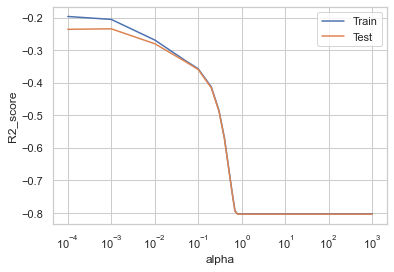

In [278]:
## Plotting R2 score vs alpha values
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

- As the value of alpha increases, we see a decrease in both train and test error. However, after a error value of approximately 0.001, error remains constant.

Text(0.5, 0, 'Errors')

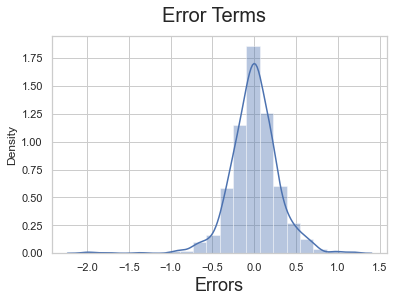

In [279]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred_l), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
#Error terms are normally distributed with mean zero

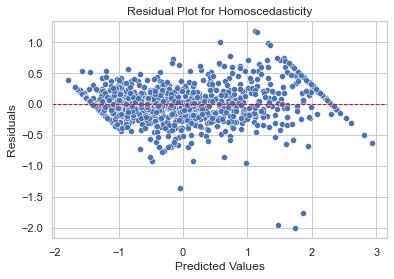

In [280]:
# Create a scatterplot of residuals against the predicted values
residuals = y_train - y_train_pred_l
sns.scatterplot(x=y_train_pred_l, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Add a horizontal line at y=0
plt.show()
#This shows error terms have constant variance

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

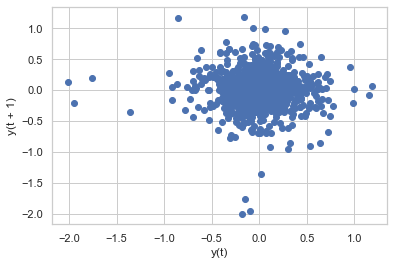

In [281]:
# lag plot to assess independence of data points

lag_plot(y_train-y_train_pred_l)
#Lagplot of residuals shows no trend on linear pattern or regular pattern. hence error terms are independent of each other

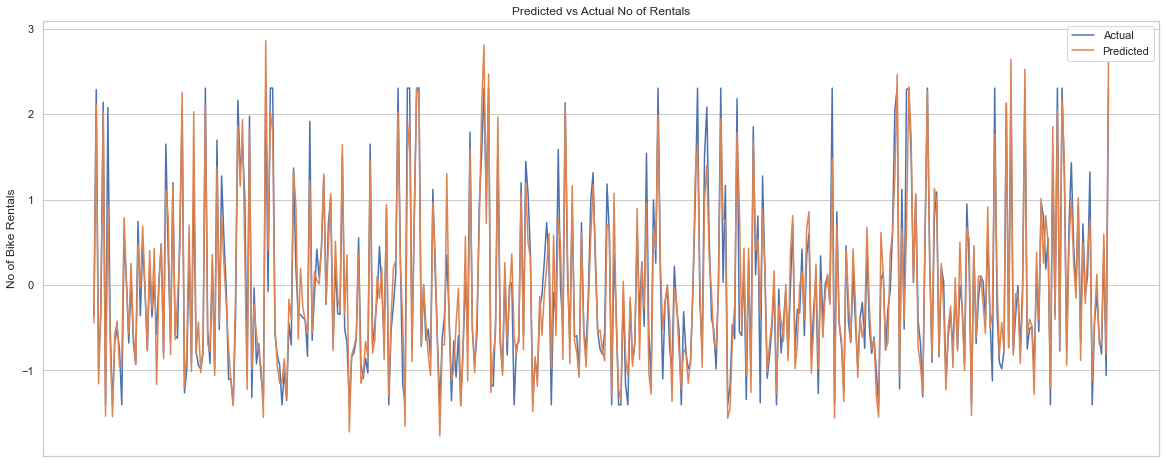

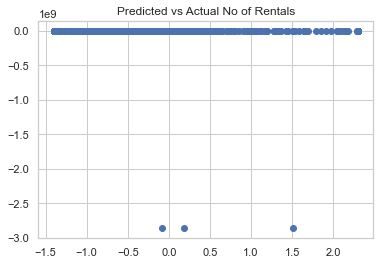

In [282]:
#Model Evaludation
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred_l)),y_pred_l)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

#plt.figure(figsize=[8,8])
plt.scatter(y_test,y_pred);
plt.title('Predicted vs Actual No of Rentals');

#Predicted vs observed value plots shows that the model is reasonably accurate.

# Comparing the models

In [283]:
## Setting float display options
#pd.options.display.float_format = "{:,.3f}".format

In [304]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            #'Linear Regression' : linear_metrics,
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric',#'Linear Regression', 
                                                 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.917,0.914
R2 Score (Test),0.903,0.903
RSS (Train),84.358,87.654
RSS (Test),43.776,43.838
MSE (Train),0.083,0.086
MSE (Test),0.100,0.100
RMSE (Train),0.287,0.293
RMSE (Test),0.316,0.316


- Both Lasso and Ridge models perform well in terms of R-squared, indicating that they explain a high percentage of the variability in the data.
- The RSS, MSE, and RMSE metrics for both Lasso and Ridge are quite similar, suggesting that the models are competitive in terms of their ability to make predictions.

In [285]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
#betas['Ridge'] = ridge.coef_
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas

,Linear,Ridge,Lasso
TotalBsmtSF,0.171,0.166,0.170
LowQualFinSF,"-62,426,363,907.598",0.000,0.000
GrLivArea,0.320,0.336,0.336
GarageCars,0.141,0.140,0.137
3SsnPorch,"-4,970,862,037.712",0.000,0.000
MiscVal,"-3,056,290,775.733",0.000,0.000
AgeofProperty,-0.166,-0.167,-0.163
MSSubClass_40,0.185,0.064,0.000
MSSubClass_60,0.274,0.150,0.112
MSSubClass_70,0.222,0.119,0.047


magnitude of coefficients from linear regression has reduced when we regularized

In [316]:
##Creating a dataframe of features and coefficients- option2

lasso_df_o2 = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df_o2 = lasso_df_o2.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df_o2.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df_o2.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,OverallQual_9_Excellent,0.696,0.696
1,OverallCond_9_Excellent,0.516,0.516
2,SaleCondition_Alloca,0.501,0.501
3,OverallQual_8_VeryGood,0.490,0.490
4,MSSubClass_90,-0.432,0.432
5,Neighborhood_Crawfor,0.373,0.373
6,GrLivArea,0.336,0.336
7,BldgType_Twnhs,-0.292,0.292
8,Exterior2nd_BrkFace,0.288,0.288
9,Neighborhood_NoRidge,0.286,0.286


In [336]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9_Excellent   2.006
OverallCond_9_Excellent   1.675
SaleCondition_Alloca      1.650
OverallQual_8_VeryGood    1.632
Neighborhood_Crawfor      1.452
GrLivArea                 1.400
Exterior2nd_BrkFace       1.333
Neighborhood_NoRidge      1.331
OverallCond_7_Good        1.299
Neighborhood_NridgHt      1.276
Name: Lasso, dtype: float64

How well top 5 variables describe the price of a house?

- OverallQual_9_Excellent & OverallQual_8_VeryGood: if the overall material and finish of the house is Very Good or Excellent, the price of house will increase by 1.63 to 2 times
- OverallCond_9_Excellent: if the overallcondition of the house is Excellent, the price of house will increase by 1.67 times
- SaleCondition_Alloca: If condition of sale is allocation having condo with a garage unit,the price of house will increase by 1.65 times
- MSSubClass_90	: Dwelling subclass will negatively effect price

# Q1: Double the values of Alpha for lasso & Ridge

In [290]:
#earlier for Ridge alpha = 4 now take 8
alpha = 8
ridge_d = Ridge(alpha=alpha)

ridge_d.fit(X_train, y_train)

y_train_pred_rd = ridge_d.predict(X_train)
y_pred_rd = ridge_d.predict(X_test)

## Check metrics
ridge_metrics_rd = show_metrics(y_train, y_train_pred_rd, y_test, y_pred_rd)
print(ridge.coef_)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 89.13
RSS (Test) = 42.77
MSE (Train) = 0.09
MSE (Test) = 0.10
RMSE (Train) = 0.30
RMSE (Test) = 0.31
[ 0.16595858  0.          0.33557033  0.1402868   0.          0.
 -0.16690321  0.06403751  0.15015982  0.11942279  0.19124998 -0.2107256
 -0.11734465 -0.10250692 -0.10721609 -0.02851163  0.22888169  0.03002133
  0.1335207   0.21247467  0.17708267  0.08390265 -0.09044116 -0.04394995
  0.16404106  0.20079062  0.34991198 -0.10631092 -0.18036585  0.15557459
  0.29119109  0.27153663 -0.17005874  0.2414565   0.22759078  0.10241433
  0.06914501 -0.10890066  0.00989941  0.16373503 -0.05837523 -0.2107256
 -0.20838846 -0.1186792   0.08400217 -0.07438936 -0.10351335  0.02815489
  0.13929447  0.44466191  0.58137484 -0.27432184 -0.09807372 -0.04642117
  0.08675371  0.20643549  0.19513142  0.4096505   0.10037425 -0.07110026
 -0.00952875 -0.00943703 -0.09863714  0.         -0.0848009   0.041481
 -0.06435638 -0.12854227 -0.07013857  0.04480

In [291]:
#earlier for Lasso alpha = .001 now take .002
alpha =.002

lasso_d = Lasso(alpha=alpha)
        
lasso_d.fit(X_train, y_train) 

y_train_pred_ld = lasso_d.predict(X_train)
y_pred_ld = lasso_d.predict(X_test)

lasso_metrics_ld = show_metrics(y_train, y_train_pred_ld, y_test, y_pred_ld)
print(lasso.coef_)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.91
RSS (Train) = 95.37
RSS (Test) = 42.50
MSE (Train) = 0.09
MSE (Test) = 0.10
RMSE (Train) = 0.31
RMSE (Test) = 0.31
[ 0.1700983   0.          0.33641942  0.13723655  0.          0.
 -0.16319644  0.          0.11193244  0.04715098  0.14520242 -0.43224327
 -0.         -0.         -0.         -0.          0.22169076  0.
  0.11691903  0.14854401  0.12501993  0.04168036 -0.05914524 -0.
  0.07724631  0.19564669  0.37318672 -0.08692136 -0.12779908  0.01717527
  0.28556407  0.2437466  -0.17054495  0.21831468  0.1957624   0.09259806
  0.00394033 -0.0409013   0.          0.04870675 -0.07742612 -0.00402632
 -0.29248749 -0.20618823  0.00716464 -0.         -0.05259109  0.
  0.15330199  0.48995873  0.69593601 -0.22361732 -0.03863338 -0.
  0.13313462  0.26132842  0.24006729  0.51587191  0.         -0.
 -0.          0.         -0.04603831  0.         -0.02850239  0.01073095
 -0.02419449 -0.07181623 -0.00706991  0.          0.          0.28763769
 -0.    

In [292]:
# Again creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics,
             'Ridge Regression_doubled' : ridge_metrics_rd,
            'Lasso Regression_doubled' : lasso_metrics_ld
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Ridge Regression_doubled', 'Lasso Regression','Lasso Regression_doubled'] )
final_metric.set_index('Metric')

,Ridge Regression,Ridge Regression_doubled,Lasso Regression,Lasso Regression_doubled
Metric,,,,
R2 Score (Train),0.917,0.913,0.914,0.907
R2 Score (Test),0.903,0.905,0.903,0.906
RSS (Train),84.358,89.127,87.654,95.371
RSS (Test),43.776,42.771,43.838,42.496
MSE (Train),0.083,0.087,0.086,0.093
MSE (Test),0.100,0.098,0.100,0.097
RMSE (Train),0.287,0.295,0.293,0.306
RMSE (Test),0.316,0.312,0.316,0.311


-  Changes in Ridge Regression metrics:

 - 	Doubling the alpha from 4 to 8 has slightly reduced the R-squared on the training data, indicating a less accurate fit to the training data.However, the R-squared on the test data increased slightly, indicating that the model's ability to generalize to new data is not significantly affected.
 - 	The RSS on the training data has increased, indicating larger errors, while the RSS on the test data has decreased, indicating smaller errors.
 - 	The MSE on the training data has increased, but the MSE on the test data reduced slightly.
 - 	The RMSE on the training data has increased slightly, but the RMSE on the test data reduced slightly.

In general, the primary goal is to have a model that generalizes well to new data. Therefore, the model with alpha = 8 seems to be better in terms of test data performance, as it shows improved R-squared, reduced RSS, and RMSE on the test data, while the changes in training data metrics are relatively small. 

- Lasso Regression:
 - 	Doubling the alpha from 0.001 to 0.002 has a minor impact on the model's performance. It slightly reduces overfitting, as indicated by the improvement in R-Squared on the test data and the decrease in RSS on the test data. However, it also results in a slight increase in RSS on the training data. 


In [293]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
#betas

In [294]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Ridge_Doubled'] = ridge_d.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso_Doubled'] = lasso_d.coef_
pd.set_option('display.max_rows', None)
betas.head(68)
#betas

,Ridge,Ridge_Doubled,Lasso,Lasso_Doubled
TotalBsmtSF,0.166,0.170,0.170,0.171
LowQualFinSF,0.000,0.000,0.000,0.000
GrLivArea,0.336,0.344,0.336,0.354
GarageCars,0.140,0.147,0.137,0.144
3SsnPorch,0.000,0.000,0.000,0.000
MiscVal,0.000,0.000,0.000,0.000
AgeofProperty,-0.167,-0.169,-0.163,-0.171
MSSubClass_40,0.064,0.040,0.000,0.000
MSSubClass_60,0.150,0.127,0.112,0.062
MSSubClass_70,0.119,0.107,0.047,0.000


In [303]:
##Creating a dataframe of features and coefficients

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge_d.coef_.round(4), 
                         'Abs_Coefficient_Ridge(Desc_Sort)':abs(ridge_d.coef_.round(4))})

##Sorting coefficient in descending order of absolute values and reset index
ridge_df = ridge_df.sort_values(by='Abs_Coefficient_Ridge(Desc_Sort)', ascending=False)
ridge_df.reset_index(drop=True, inplace=True)  

#Dataframe rdige_df
ridge_df.head(10)    #Top10 features display

,Features,Coefficient,Abs_Coefficient_Ridge(Desc_Sort)
0,OverallQual_9_Excellent,0.511,0.511
1,OverallQual_8_VeryGood,0.417,0.417
2,GrLivArea,0.344,0.344
3,OverallCond_9_Excellent,0.324,0.324
4,Neighborhood_Crawfor,0.316,0.316
5,SaleCondition_Alloca,0.262,0.262
6,OverallCond_3_Fair,-0.246,0.246
7,Neighborhood_NridgHt,0.244,0.244
8,Neighborhood_NoRidge,0.240,0.240
9,KitchenQual_TA,-0.238,0.238


In [296]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
#ridge_coeffs = np.exp(betas['Ridge_Doubled'])
#ridge_coeffs.sort_values(ascending=False)[:10]

In [300]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso_d.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso_d.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(10)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,OverallQual_9_Excellent,0.724,0.724
1,OverallQual_8_VeryGood,0.501,0.501
2,OverallCond_9_Excellent,0.427,0.427
3,MSSubClass_90,-0.409,0.409
4,Neighborhood_Crawfor,0.355,0.355
5,GrLivArea,0.354,0.354
6,BldgType_Twnhs,-0.242,0.242
7,Exterior2nd_BrkFace,0.240,0.240
8,OverallCond_7_Good,0.218,0.218
9,SaleCondition_Alloca,0.216,0.216


In [298]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
#lasso_coeffs = np.exp(betas['Lasso_Doubled'])
#lasso_coeffs.sort_values(ascending=False)[:10]

# Que3: Drop the Top 5 features and rebuild lasso

In [320]:
#Top five features in Lasso Model (before removing) were as follows:
lasso_df_o2['Features'].head(5) 

0    OverallQual_9_Excellent
1    OverallCond_9_Excellent
2       SaleCondition_Alloca
3     OverallQual_8_VeryGood
4              MSSubClass_90
Name: Features, dtype: object

In [335]:
lasso_df_o2.head(5) 

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,OverallQual_9_Excellent,0.696,0.696
1,OverallCond_9_Excellent,0.516,0.516
2,SaleCondition_Alloca,0.501,0.501
3,OverallQual_8_VeryGood,0.490,0.490
4,MSSubClass_90,-0.432,0.432


In [321]:
#Drop top5 lasso features
X_train_dropped = X_train.drop(['OverallQual_9_Excellent', 'OverallCond_9_Excellent', 'SaleCondition_Alloca', 'OverallQual_8_VeryGood'
                               , 'MSSubClass_90'], axis=1)

In [322]:
X_test_dropped = X_test.drop(['OverallQual_9_Excellent', 'OverallCond_9_Excellent', 'SaleCondition_Alloca', 'OverallQual_8_VeryGood'
                               , 'MSSubClass_90'], axis=1)

In [324]:
## Now to create a Lasso model
## we will run a cross validation on a list of alphas to find the optimum value of alpha


lassoCV  = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_dropped, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [325]:
# Printing the best hyperparameter alpha
print(lassoCV.best_params_)

{'alpha': 0.001}


In [326]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_dropped, y_train) 

Lasso(alpha=0.001)

In [328]:

## Make predictions

y_train_pred = lasso.predict(X_train_dropped)
y_pred = lasso.predict(X_test_dropped)
## Check metrics
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.90
RSS (Train) = 104.83
RSS (Test) = 46.55
MSE (Train) = 0.10
MSE (Test) = 0.11
RMSE (Train) = 0.32
RMSE (Test) = 0.33


In [329]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Lasso Regression
Metric,
R2 Score (Train),0.897
R2 Score (Test),0.897
RSS (Train),104.834
RSS (Test),46.548
MSE (Train),0.103
MSE (Test),0.106
RMSE (Train),0.320
RMSE (Test),0.326


In [332]:
##Creating a dataframe of features and coefficients

lasso_df = pd.DataFrame({'Features':X_train_dropped.columns, 'Coefficient':lasso.coef_.round(4), \
                         'Abs_Coefficient_Lasso(Desc_Sort)':abs(lasso.coef_.round(4))})
##Sorting coefficient in descending order of absolute values and reset index
lasso_df = lasso_df.sort_values(by='Abs_Coefficient_Lasso(Desc_Sort)', ascending=False)
lasso_df.reset_index(drop=True, inplace=True)  

#lasso df
lasso_df.head(5)   #Top10 features display

,Features,Coefficient,Abs_Coefficient_Lasso(Desc_Sort)
0,BldgType_Duplex,-0.445,0.445
1,OverallCond_3_Fair,-0.444,0.444
2,Neighborhood_StoneBr,0.422,0.422
3,Neighborhood_Crawfor,0.394,0.394
4,KitchenQual_TA,-0.378,0.378


In [334]:
print(lasso_df['Features'].head(5))

0         BldgType_Duplex
1      OverallCond_3_Fair
2    Neighborhood_StoneBr
3    Neighborhood_Crawfor
4          KitchenQual_TA
Name: Features, dtype: object
